In [1]:
import pandas as pd

# Preprocessing

In [6]:
# save movie titles into movieTitle.txt
# ignore " marks
movie_titles = pd.read_csv('./ml-latest-small/movies.csv')['title']
movie_titles.replace('"', "").to_csv('movieTitle.txt', index=False, header=False)

'American President, The (1995)'

In [ ]:
# last saved Jumpin' Jack Flash

# Postprocessing

In [55]:
# 
ctr = 0
scripts = []
with open('./scripts.txt') as file:
  for line in file:
    if line.rstrip() != "None":
      ctr += 1
    scripts.append(line.rstrip())
ctr

245

In [56]:
movies = pd.read_csv('./ml-latest-small/movies.csv')

In [57]:
movies = movies.loc[:len(scripts)-1] # only scraped subset of movies' scripts

In [58]:
movies['scripts'] = scripts

In [59]:
papers = movies[movies['scripts'] != 'None']

# Trying out Python LDA from [here](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [60]:
import re

# Remove punctuation
papers['scripts_processed'] = \
papers['scripts'].map(lambda x: re.sub('[,.!?]|', '', x))
papers['scripts_processed'] = \
papers['scripts'].map(lambda x: re.sub(r'[A-Z]+(?![a-z])', '', x))

# Convert the titles to lowercase
papers['scripts_processed'] = \
papers['scripts_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['scripts_processed'].head()

/var/folders/3q/46mhvg_95v3dkwjv0vvp3r1r0000gn/T/ipykernel_15017/2099419302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers['scripts_processed'] = \
/var/folders/3q/46mhvg_95v3dkwjv0vvp3r1r0000gn/T/ipykernel_15017/2099419302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers['scripts_processed'] = \
/var/folders/3q/46mhvg_95v3dkwjv0vvp3r1r0000gn/T/ipykernel_15017/2099419302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

0        " " original story by john lasseter pete do...
5        an original screenplay by lawrence kasdan  ...
15    casino - draft  by nicholas pileggi .   ,  , 1...
16     "  " screenplay by emma thompson based on the...
21    copycat  third draft by frank pierson particip...
Name: scripts_processed, dtype: object

In [61]:
papers['scripts_processed'] = \
papers['scripts'].map(lambda x: re.sub('(/\*)|-', '', x))

<>:2: DeprecationWarning: invalid escape sequence \*
<>:2: DeprecationWarning: invalid escape sequence \*
/var/folders/3q/46mhvg_95v3dkwjv0vvp3r1r0000gn/T/ipykernel_15017/2351954325.py:2: DeprecationWarning: invalid escape sequence \*
  papers['scripts'].map(lambda x: re.sub('(/\*)|-', '', x))
/var/folders/3q/46mhvg_95v3dkwjv0vvp3r1r0000gn/T/ipykernel_15017/2351954325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papers['scripts_processed'] = \


In [ ]:
from wordcloud import WordCloud

/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/wordcloud/wordcloud.py:513: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/wordcloud/wordcloud.py:513: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/jessicaho/Desktop/267/267en

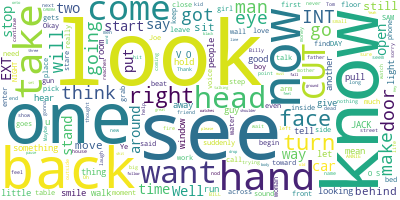

In [54]:
# Join the different processed titles together.
long_string = ','.join(list(papers['scripts_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora

from pprint import pprint

In [62]:
stop_words = stopwords.words('english')
stop_words.extend([
    'script', 'website', 'http', 'wsabstract', 'com', 'scripts', 
    'screenplay', 'int', 'ext', 'back', 'like', 'one', 'man', 'looks',
    'door', 'know', 'night', 'right', 'day', 'get', 'around', 'room',
    'see', 'go', 'got', 'look'
])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.scripts_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['toy', 'story', 'toy', 'story', 'original', 'story', 'john', 'lasseter', 'pete', 'docter', 'andrew', 'stanton', 'joe', 'ranft', 'joss', 'whedon', 'andrew', 'stanton', 'joel', 'cohen', 'alec', 'sokolow', 'final', 'draft', 'november', 'toy', 'story', 'fade', 'andy', 'bedroom']


In [63]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 2), (18, 28), (19, 1), (20, 1), (21, 9), (22, 4), (23, 1), (24, 2), (25, 5), (26, 1), (27, 1), (28, 1), (29, 1)]


In [65]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.003*"two" + 0.003*"jack" + 0.003*"time" + 0.003*"car" + 0.002*"eyes" + '
  '0.002*"away" + 0.002*"well" + 0.002*"want" + 0.002*"behind" + '
  '0.002*"continued"'),
 (1,
  '0.003*"cut" + 0.003*"two" + 0.003*"good" + 0.003*"away" + 0.002*"way" + '
  '0.002*"turns" + 0.002*"going" + 0.002*"hand" + 0.002*"jack" + 0.002*"time"'),
 (2,
  '0.003*"hand" + 0.003*"want" + 0.003*"going" + 0.003*"face" + 0.003*"away" + '
  '0.003*"turns" + 0.003*"come" + 0.003*"time" + 0.003*"cut" + 0.002*"think"'),
 (3,
  '0.003*"away" + 0.003*"cut" + 0.003*"head" + 0.003*"jack" + 0.003*"want" + '
  '0.003*"time" + 0.003*"think" + 0.002*"two" + 0.002*"way" + 0.002*"little"'),
 (4,
  '0.003*"away" + 0.003*"face" + 0.003*"two" + 0.003*"think" + 0.002*"come" + '
  '0.002*"still" + 0.002*"eyes" + 0.002*"time" + 0.002*"well" + 0.002*"hand"'),
 (5,
  '0.003*"turns" + 0.003*"away" + 0.003*"face" + 0.003*"well" + 0.003*"think" '
  '+ 0.003*"jeff" + 0.003*"two" + 0.003*"car" + 0.002*"cut" + 0.002*"takes"'),
 (6,

In [42]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import os
pyLDAvis.enable_notebook()

In [66]:
# Visualize the topics
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jessicaho/Desktop/267/267env/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/User

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.002838  0.002668       1        1  13.393509
0      0.004578  0.001216       2        1  12.209748
6      0.004323 -0.002643       3        1  11.976353
8     -0.011421  0.001814       4        1  10.672595
5     -0.001335 -0.005559       5        1  10.182158
2      0.002542 -0.007443       6        1   9.862886
9     -0.001907 -0.000998       7        1   9.272295
4      0.005077  0.008024       8        1   9.172011
3      0.001069  0.002818       9        1   9.096025
1     -0.000088  0.000103      10        1   4.162420, topic_info=          Term         Freq        Total Category  logprob  loglift
7706   forrest  1161.000000  1161.000000  Default  30.0000  30.0000
1245      jack  4830.000000  4830.000000  Default  29.0000  29.0000
5947      jeff  1965.000000  1965.000000  Default  28.0000  28.0000
18535     duke  1622.000000  1622.000000  Default  27.0000  27.0000
19179   norman   995.000000   995.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
439       come   223.827744  6474.277283  Topic10  -6.2506  -0.1856
2676        us   196.632025  4741.528774  Topic10  -6.3801  -0.0037
329        car   221.261055  6961.766786  Topic10  -6.2621  -0.2698
1081      head   209.677665  6603.479185  Topic10  -6.3159  -0.2707
1391    little   199.961644  5712.125402  Topic10  -6.3633  -0.1731

[903 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
28515      1  0.122317  abbie
28515      3  0.061158  abbie
28515      4  0.061158  abbie
28515      5  0.061158  abbie
28515      6  0.489267  abbie
...      ...       ...    ...
57014      6  0.087414   zorg
57014      7  0.127759   zorg
57014      8  0.060517   zorg
57014      9  0.127759   zorg
57014     10  0.127759   zorg

[5141 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 7, 9, 6, 3, 10, 5, 4, 2])